In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from PIL import ImageGrab

def maak_screenshot(bbox):
    """
    Maakt een screenshot van een opgegeven gebied op het scherm.

    Args:
        bbox (tuple): Een tuple van (left, top, right, bottom) coördinaten van het gebied.

    Returns:
        PIL.Image.Image: Een Pillow Image object van de screenshot.
    """
    screenshot = ImageGrab.grab(bbox=bbox)
    return screenshot

spelbord_bbox = (0, 0, 1300, 1000) # Voorbeeld coördinaten, aanpassen aan jouw situatie
screenshot_afbeelding = maak_screenshot(spelbord_bbox)
#6 keer met muis wiel uitzoomen

In [2]:
template_map = {
    '1': cv2.imread('Template/1.png', cv2.IMREAD_GRAYSCALE),
    '2': cv2.imread('Template/2.png', cv2.IMREAD_GRAYSCALE),
    '3': cv2.imread('Template/3.png', cv2.IMREAD_GRAYSCALE),
    '4': cv2.imread('Template/4.png', cv2.IMREAD_GRAYSCALE),
    'bom': cv2.imread('Template/bom.png', cv2.IMREAD_GRAYSCALE),
    'flag': cv2.imread('Template/flag.png', cv2.IMREAD_GRAYSCALE),
    'leeg_geklikt': cv2.imread('Template/leeg_geklikt.png', cv2.IMREAD_GRAYSCALE),
    'leeg_niet_geklikt': cv2.imread('Template/leeg_niet_geklikt.png', cv2.IMREAD_GRAYSCALE)
    '1': cv2.imread('Template/k_1.png', cv2.IMREAD_GRAYSCALE),
    '2': cv2.imread('Template/k_2.png', cv2.IMREAD_GRAYSCALE),
    '3': cv2.imread('Template/k_3.png', cv2.IMREAD_GRAYSCALE),
    '4': cv2.imread('Template/4.png', cv2.IMREAD_GRAYSCALE),
    'bom': cv2.imread('Template/k_bom.png', cv2.IMREAD_GRAYSCALE),
    'flag': cv2.imread('Template/k_flag.png', cv2.IMREAD_GRAYSCALE),
    'leeg_geklikt': cv2.imread('Template/k_leeg_geklikt.png', cv2.IMREAD_GRAYSCALE),
    'leeg_niet_geklikt': cv2.imread('Template/leeg_niet_geklikt.png', cv2.IMREAD_GRAYSCALE)
}

Alle template plaatjes zijn omgezet naar Canny afbeeldingen en opgeslagen in canny_template_map.


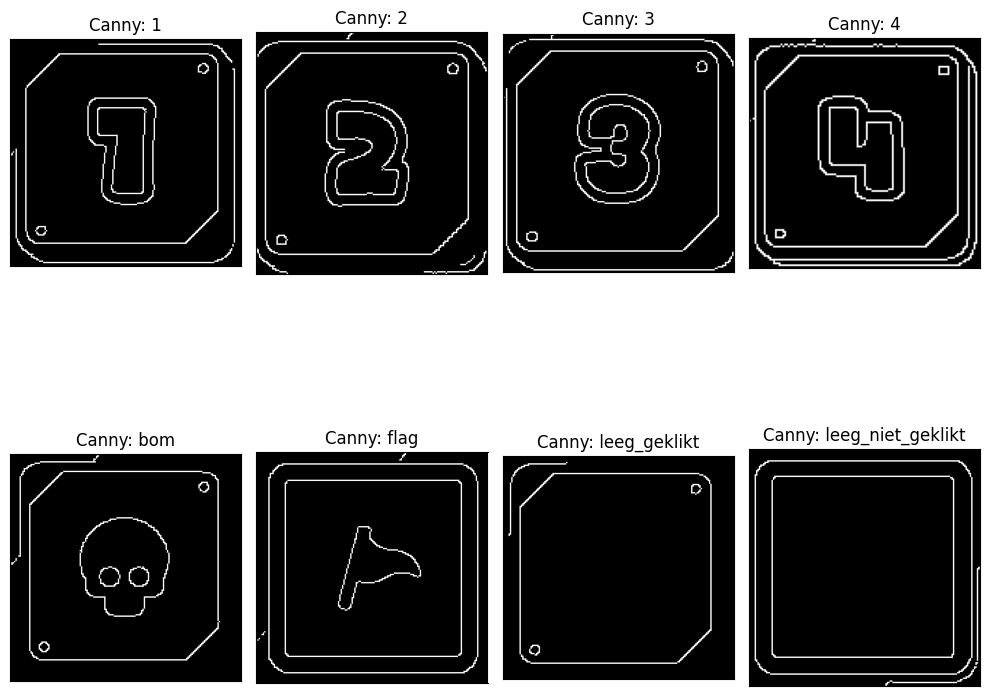

Alle gecannyde template plaatjes zijn geplot.


In [27]:
canny_template_map = {}

for naam, template_img in template_map.items():
    if template_img is not None:
        canny_template = cv2.Canny(template_img, 200, 250, apertureSize=3) # Dezelfde drempelwaarden als eerder, pas aan indien nodig
        canny_template_map[naam] = canny_template
    else:
        print(f"Waarschuwing: Template plaatje voor '{naam}' kon niet worden gecannyd omdat het niet geladen is.")
        canny_template_map[naam] = None # Behoud None als placeholder

print("Alle template plaatjes zijn omgezet naar Canny afbeeldingen en opgeslagen in canny_template_map.")
# Je kunt nu de canny_template_map gebruiken in je verdere code.

# Aanmaken van een figuur voor de subplots
plt.figure(figsize=(10, 10)) # Optioneel: bepaal de grootte van de figuur

aantal_templates = len(canny_template_map)
aantal_kolommen = 4 # Je kunt dit aanpassen, bijvoorbeeld 4 kolommen
aantal_rijen = (aantal_templates + aantal_kolommen - 1) // aantal_kolommen # Bereken het aantal rijen automatisch

i = 1 # Subplot teller

for naam, canny_template in canny_template_map.items():
    plt.subplot(aantal_rijen, aantal_kolommen, i) # Maak een subplot
    if canny_template is not None:
        plt.imshow(canny_template, cmap='gray') # Toon de Canny afbeelding
        plt.title(f'Canny: {naam}') # Titel met de template naam
    else:
        plt.title(f'Template {naam}: Niet Beschikbaar') # Titel indien template niet geladen is
    plt.xticks([]), plt.yticks([]) # Verwijder x en y as ticks
    i += 1

plt.tight_layout() # Zorg voor een nette layout van de subplots
plt.show()

print("Alle gecannyde template plaatjes zijn geplot.")

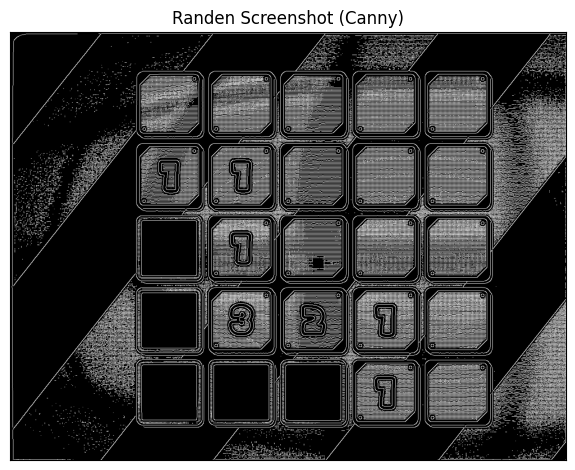

Randen afbeeldingen geplot.
Canny template map is aangemaakt: canny_template_map


In [22]:
screenshot_cv = cv2.imread('spelbord_screenshot2.png')
screenshot_grijs = cv2.cvtColor(screenshot_cv, cv2.COLOR_BGR2GRAY)

# 1. Canny edge detectie op de screenshot
randen_screenshot = cv2.Canny(screenshot_grijs, 200, 250, apertureSize=5)


plt.imshow(randen_screenshot, cmap='gray')
plt.title('Randen Screenshot (Canny)')
plt.xticks([]), plt.yticks([])


plt.tight_layout() # Zorgt voor een nette layout van de subplots
plt.show()

print("Randen afbeeldingen geplot.")
print("Canny template map is aangemaakt: canny_template_map")

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ... (Je eerdere code om template_map, canny_template_map en randen_screenshot te genereren moet hier staan) ...

drempel = 0.7 # Dezelfde drempelwaarde als eerder, pas aan indien nodig

gevonden_templates_data = [] # Lijst om gevonden templates en hun locaties op te slaan

for naam, canny_template in canny_template_map.items():
    if canny_template is not None:
        resultaat = cv2.matchTemplate(randen_screenshot, canny_template, cv2.TM_CCOEFF_NORMED)
        locaties = np.where(resultaat >= drempel)
        for pt in zip(*locaties[::-1]):
            gevonden_templates_data.append({'naam': naam, 'locatie': pt}) # Opslaan naam en locatie

# Sorteer de gevonden templates op locatie (eerst y, dan x om rijen te ordenen)
gevonden_templates_data.sort(key=lambda item: (item['locatie'][1], item['locatie'][0]))

# Bepaal de grid afmetingen (aantal rijen en kolommen) (vereenvoudigde aanname van een regulier raster)
if gevonden_templates_data:
    y_coordinaten = [item['locatie'][1] for item in gevonden_templates_data]
    x_coordinaten = [item['locatie'][0] for item in gevonden_templates_data]

    # Aanname: Templates zijn in rijen en kolommen geordend. Vind unieke y en x coordinaten om rijen en kolommen te bepalen
    unieke_y_coords = sorted(list(set(y_coordinaten)))
    unieke_x_coords = sorted(list(set(x_coordinaten)))

    aantal_rijen = len(unieke_y_coords)
    aantal_kolommen = len(unieke_x_coords)

    spelbord_lijst = [['leeg' for _ in range(aantal_kolommen)] for _ in range(aantal_rijen)] # Initialiseer met 'leeg'

    # Vul de spelbord_lijst met template namen op basis van locatie
    for template_info in gevonden_templates_data:
        naam = template_info['naam']
        locatie = template_info['locatie']

        # Vind de rij en kolom index door te kijken naar de positie van de y en x coordinaten in de unieke lijsten
        rij_index = unieke_y_coords.index(locatie[1])
        kolom_index = unieke_x_coords.index(locatie[0])

        spelbord_lijst[rij_index][kolom_index] = naam

    # Print de spelbord_lijst
    print("\nSpelbord Representatie:")
    for rij in spelbord_lijst:
        print(rij)

else:
    print("Geen templates gevonden boven de drempelwaarde.")


Spelbord Representatie:
['leeg', 'leeg_geklikt', 'leeg_geklikt', 'leeg', 'leeg']
['1', 'leeg', 'leeg', 'leeg', 'leeg']
['leeg_niet_geklikt', 'leeg', 'leeg', 'leeg', 'leeg']
['leeg', 'leeg', 'leeg', 'leeg', '2']
['leeg', 'leeg', 'leeg', '3', 'leeg']
